# Logistic Regression on Moons Dataset

First, we will import some needed libraries:

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

We define each of the following functions needed. Note that all functions should take **a vector input** (i.e. t is an 1-d array).   
1. sigmoid function sigmoid(t). (**Rearranged to avoid overflows**.)
2. the mean cross-entropy loss function given the inputs of label y and prediction y_hat = sigmoid(z) for the N data points, where y, y_hat are vectors of dimension N. (N = # of data points.)

In [23]:
# Takes a vector t as input, returns a vector sig_t, which is the element wise sigmoid of t.
def sigmoid(t):
  # Initialize a vector to contain sigmoid values
  sig_t = np.zeros(shape = t.shape)

  # Find sigmoid vector
  for idx, value in enumerate(t):
    sig_t[idx] = __sigmoid_function(value)

  return sig_t


# Finds sigmoid of a single value.
def __sigmoid_function(value):
  return (1 + np.exp(-value))**(-1)


def log_sig(t):
    # compute log(sigmoid(t)) to be used in loss

    y = 0*t
    m=t.shape[0]
    for i in range(m):
      if t[i] < 0:
        y[i] = t[i]-np.log(1+np.exp(t[i]))
      else:
        y[i] = -np.log(1+np.exp(-t[i]))

    return y

def log_one_sig(t):
    # compute log(1-sigmoid(t)) to be used in loss

    y = 0*t
    m=t.shape[0]
    for i in range(m):
      if t[i] < 0:
        y[i] = -np.log(1+np.exp(t[i]))
      else:
        y[i] = -t[i]- np.log(1+np.exp(-t[i]))

    return y

def loss(y, z):
    # compute loss(y, sigmoid(z))
    # y --> label
    # z --> model output

    loss = np.mean(-y*(log_sig(z)) - (1-y)*log_one_sig(z))
    return loss

Define the model output z=w^T x + b, or z = x^Tw + b, given the data input X (**an N-by-n array containing N data points**) and the model parameters w (n-dimensional weigth vector) and b (bias).

Note that mathematically it's common to write the data matrix as an n-by-N matrix, with each column being a data point. In python, the data is more commonly represented as an N-by-n array.

In [24]:
# X --> Input.
# z --> model output.
# w --> weight.
# b --> bias.

# Computes z = w * X^t + b
def model(w,b,X):
  return np.dot(X, w) + b

Define the function that computes the gradient of the cross-entropy loss given the label y (N-vector), the model prediction y_hat = sigmoid(z) (N-vector), and the dataset X (an N-by-n array). It's probably easier to return the gradients with respect to w and b separately, which can be used to update w and b later on.

In [25]:
# X --> Input.
# y --> Label.
# y_hat --> model prediction sigmoid(z)
# output - dw (gradient with respect to w)
#        - db (gradient with respect to b)
def gradients(X, y, y_hat):
  # Find db
  difference = y_hat - y
  db = np.mean(difference)

  # Find dw
  dw = np.matmul(X.transpose(), difference)
  dw = np.array([np.mean(grad) for grad in dw])
  # dw = dw.shape(w) # This line was causing the error

  return dw, db

Write the function that minimizes the loss (i.e. training) by the gradient descent algorithm using a fixed number of iteration (*iter*) and learning rate (*lr*). Your function should take *iter* and *lr* as well as the initial weight w, initial bias b, the input data X and the label y as the inputs. It produces new w and b as output. Also compute the loss value at each iteration and output the sequence of the loss.

In [26]:
# X --> Input.
# y --> label.
# lr --> learning rate
# iter --> number of iterations
# w --> initial weight on input and the trained weight on output
# b --> initial bias on input and the trained bias on output
# losses --> an array of dimension iter containing the sequence of losses
def train(w, b, X, y, iter, lr):
  losses = [] # Initialize a list to store losses
  for i in range(iter):
    # Calculate zf
    z = model(w, b, X)

    # Calculate yhat
    y_hat = sigmoid(z)

    # Calculate gradient
    dw, db = gradients(X, y, y_hat)

    # Update weights
    w -= lr * dw # This was giving me an error when I had it as w -= lr * dw
    b -= lr * db

    # Calculate and store the loss
    current_loss_value = loss(y, y_hat) # Renamed from current_loss to current_loss_value
    losses.append(current_loss_value) # Use current_loss_value here

  # Return updated weight, bias, and the list of losses
  return w, b, losses

1. Write the function that uses a trained model to produce

*   List item
*   List item

class prediction (0 or 1) for an input dataset X, i.e. turn the model output z = model(w,b,X) into predicted label y_label (N-vector of 0 or 1).
2. For an input dataset X with a known label y (e.g. a training or testing dataset) and a predicted label y_label, compute the accuracy of prediction (i.e. # correct predictions/N)

In [27]:
# z --> model output z
# output: model class prediction (0 or 1)
def predict(z):
  # Returns 1 for all zi > 0.5, 0 otherwise.
  return [1 if value > 0.5 else 0 for value in z]


# y --> the labels
# yhat --> the predicted labels
# output: percentage of correct predictions
def accuracy(y, yhat):
  return np.mean(y == yhat)

We are ready to test your programs on some datasets. First, we use a synthetic dataset generated using [scikit-learn](https://scikit-learn.org/stable/datasets.html) package. We generate a dataset for training and simultaneously a dataset for testing.

(500, 2)


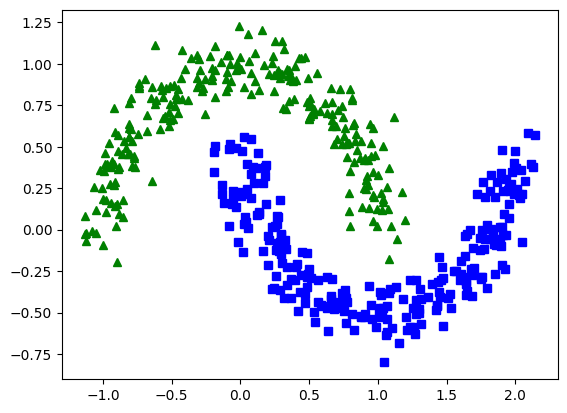

In [28]:
from sklearn.datasets import make_moons
np.random.seed(0)
X_train, y_train = make_moons(n_samples=500, noise=0.1)
X_test, y_test = make_moons(n_samples=1000, noise=0.1)

print(X_train.shape)
plt.figure()
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "g^")
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs")



We now train the model using (X_train, y_train). We initialize weight as a random vector, and b=0. We plot the loss convergence history.
We compute the prediction accuracy on (X_train, y_train).

Training set accuracy: 0.79


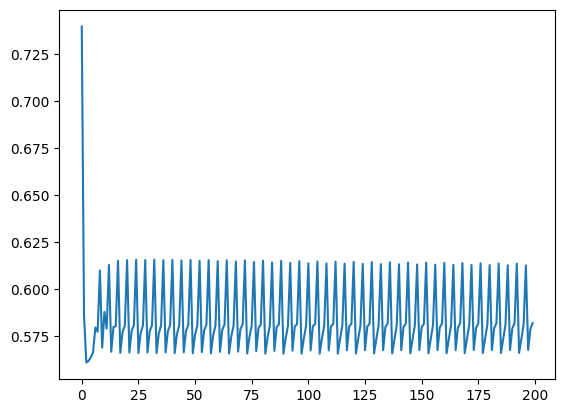

In [29]:
np.random.seed(0)
w = np.random.rand(X_train.shape[1])  # assuming X is N-by-n.
                                    # if X is n-by-N, use X_train.shape[0]
b = 0
# train the model on the training set
w, b, loss_history = train(w, b, X_train, y_train, iter=200, lr=0.1) # Renamed loss to loss_history
plt.figure()
plt.plot(loss_history) # Plot the loss_history

#training accuracy
z = model(w,b,X_train)
print(f'Training set accuracy: {accuracy(np.squeeze(y_train), predict(z))}')

To see how well our model performs, we compute its accuracy on the testing dataset (X_test, y_test).

In [30]:
z = model(w,b,X_test)
y_test=np.squeeze(y_test)
print(f'Testing set accuracy: {accuracy(y_test, predict(z))}')

Testing set accuracy: 0.801


In [31]:
# Helper function to plot the decision boundary
def plot_decision_boundary(model_func, X, y):
    # Set min and max values and step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

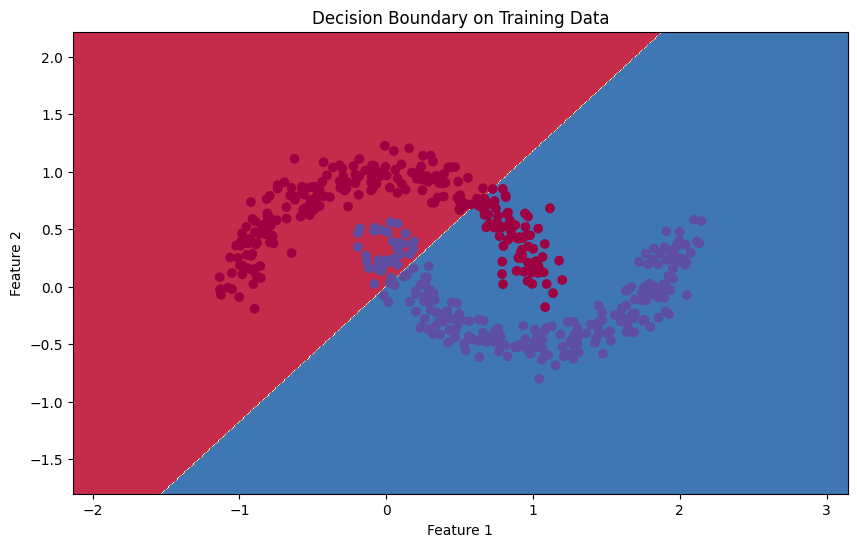

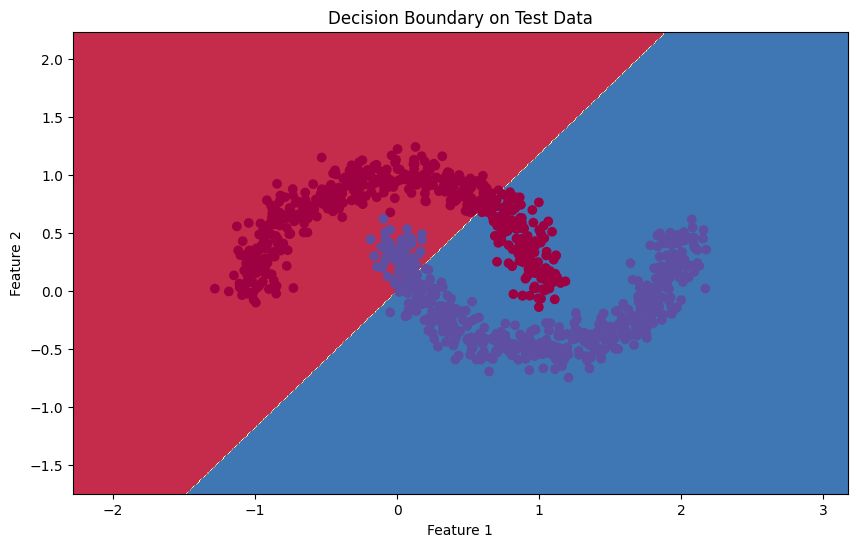

In [33]:
# Define a model function that takes X and returns predicted labels
def model_predict(X):
    z = model(w, b, X)
    return np.array(predict(z))

# Plot the decision boundary for the training set
plt.figure(figsize=(10, 6))
plot_decision_boundary(model_predict, X_train, y_train)
plt.title("Decision Boundary on Training Data")
plt.show()

# Plot the decision boundary for the test set
plt.figure(figsize=(10, 6))
plot_decision_boundary(model_predict, X_test, y_test)
plt.title("Decision Boundary on Test Data")
plt.show()